In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# --- Parameters ---
λ1, λ2, λ3 = 2.0, 1.5, 0.5   # rates (calls/min)
p = 0.3                      # probability of priority call
SIM_TIME = 120               # minutes (2 hours)

np.random.seed(42)

In [ ]:
# --- Generate call arrivals for each center ---
def generate_poisson_arrivals(rate, t_max):
    times = []
    time = 0
    while time < t_max:
        time += np.random.exponential(1/rate) # Inter arrival time follow exp distribution
        if time < t_max:
            times.append(time)
    return np.array(times)

In [6]:
A = generate_poisson_arrivals(λ1, SIM_TIME)
B = generate_poisson_arrivals(λ2, SIM_TIME)
C = generate_poisson_arrivals(λ3, SIM_TIME)


In [13]:
# --- Superposition: merge and sort all events ---

all_calls=np.sort(np.concatenate([A,B,C]))


In [14]:
# --- Thinning: keep only priority calls ---
priority_mask = np.random.rand(len(all_calls)) < p
priority_calls = all_calls[priority_mask]

In [17]:
#  Analyzing Inter-Arrival time
inter_arrivals=np.diff(priority_calls)
mean_interarrival=np.mean(inter_arrivals)


In [18]:

# --- Theoretical rate ---
λ_total = λ1 + λ2 + λ3
λ_priority = p * λ_total
theoretical_mean = 1 / λ_priority

In [19]:
# --- Display results ---
print(f"Simulated mean inter-arrival time: {mean_interarrival:.3f} min")
print(f"Theoretical mean inter-arrival time: {theoretical_mean:.3f} min")
print(f"Theoretical rate λ_p: {λ_priority:.3f} calls/min")

Simulated mean inter-arrival time: 0.941 min
Theoretical mean inter-arrival time: 0.833 min
Theoretical rate λ_p: 1.200 calls/min


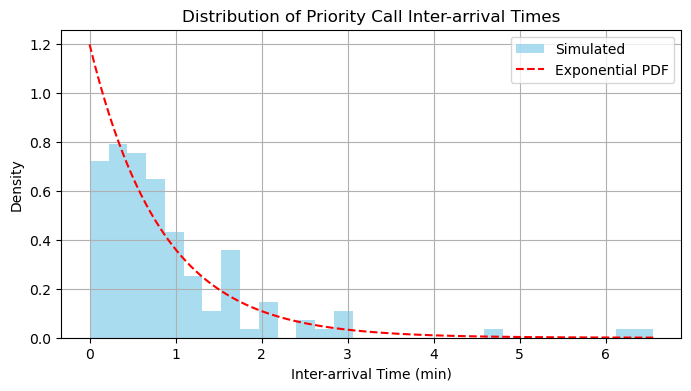

In [21]:
# --- Plot histogram ---
plt.figure(figsize=(8,4))
plt.hist(inter_arrivals, bins=30, density=True, alpha=0.7, color='skyblue', label='Simulated')
x = np.linspace(0, max(inter_arrivals), 1000)
plt.plot(x, λ_priority * np.exp(-λ_priority * x), 'r--', label='Exponential PDF')
plt.xlabel("Inter-arrival Time (min)")
plt.ylabel("Density")
plt.title("Distribution of Priority Call Inter-arrival Times")
plt.legend()
plt.grid(True)
plt.show()